In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
pdd= pd.read_csv("/kaggle/input/periodontal/periodontal disease.csv")

In [2]:
pdd.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,ORALHEALTH_SEVEREPERIODONTALDISEASE,Prevalence of severe periodontal disease in pe...,numeric,EMR,Eastern Mediterranean,Country,YEM,Yemen,Year,2019,...,NaN,NaN,NaN,NaN,NaN,10.3,NaN,NaN,EN,2023-04-17T07:00:00.000Z
1,ORALHEALTH_SEVEREPERIODONTALDISEASE,Prevalence of severe periodontal disease in pe...,numeric,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,NaN,NaN,NaN,10.6,NaN,NaN,EN,2023-04-17T07:00:00.000Z
2,ORALHEALTH_SEVEREPERIODONTALDISEASE,Prevalence of severe periodontal disease in pe...,numeric,EMR,Eastern Mediterranean,Country,SAU,Saudi Arabia,Year,2019,...,NaN,NaN,NaN,NaN,NaN,10.8,NaN,NaN,EN,2023-04-17T07:00:00.000Z
3,ORALHEALTH_SEVEREPERIODONTALDISEASE,Prevalence of severe periodontal disease in pe...,numeric,EUR,Europe,Country,TJK,Tajikistan,Year,2019,...,NaN,NaN,NaN,NaN,NaN,10.8,NaN,NaN,EN,2023-04-17T07:00:00.000Z
4,ORALHEALTH_SEVEREPERIODONTALDISEASE,Prevalence of severe periodontal disease in pe...,numeric,EMR,Eastern Mediterranean,Country,SDN,Sudan,Year,2019,...,NaN,NaN,NaN,NaN,NaN,10.9,NaN,NaN,EN,2023-04-17T07:00:00.000Z


In [3]:
missing_value=pdd.isnull().sum()
missing_value

IndicatorCode                   0
Indicator                       0
ValueType                       0
ParentLocationCode              0
ParentLocation                  0
Location type                   0
SpatialDimValueCode             0
Location                        0
Period type                     0
Period                          0
IsLatestYear                    0
Dim1 type                     194
Dim1                          194
Dim1ValueCode                 194
Dim2 type                     194
Dim2                          194
Dim2ValueCode                 194
Dim3 type                     194
Dim3                          194
Dim3ValueCode                 194
DataSourceDimValueCode        194
DataSource                    194
FactValueNumericPrefix        194
FactValueNumeric                0
FactValueUoM                  194
FactValueNumericLowPrefix     194
FactValueNumericLow           194
FactValueNumericHighPrefix    194
FactValueNumericHigh          194
Value         

Selecting columns I need

In [4]:
df_cleaned = pdd.drop(columns=['IndicatorCode','Location type','Period type','IsLatestYear','ValueType','ParentLocationCode','SpatialDimValueCode','FactValueUoM','FactValueNumericLowPrefix','FactValueNumericLow','FactValueNumericHighPrefix','FactValueNumericHigh','FactValueTranslationID'	,'FactComments','Language','Dim1 type',	'Dim1',	'Dim1ValueCode','Dim2 type','Dim2','Dim2ValueCode',	'Dim3 type','Dim3','Dim3ValueCode','DataSourceDimValueCode','DataSource','FactValueNumericPrefix','FactValueUoM', 'FactValueNumericLowPrefix','FactValueNumericLow','FactValueNumericHighPrefix','FactValueNumericHigh','FactValueTranslationID','FactComments'])
df_cleaned = df_cleaned.rename(columns={'Period': 'Year', 'Location': 'Country'})


df_cleaned.head()

,Indicator,ParentLocation,Country,Year,FactValueNumeric,Value,DateModified
0,Prevalence of severe periodontal disease in pe...,Eastern Mediterranean,Yemen,2019,10.27,10.3,2023-04-17T07:00:00.000Z
1,Prevalence of severe periodontal disease in pe...,Europe,United Kingdom of Great Britain and Northern I...,2019,10.60,10.6,2023-04-17T07:00:00.000Z
2,Prevalence of severe periodontal disease in pe...,Eastern Mediterranean,Saudi Arabia,2019,10.75,10.8,2023-04-17T07:00:00.000Z
3,Prevalence of severe periodontal disease in pe...,Europe,Tajikistan,2019,10.81,10.8,2023-04-17T07:00:00.000Z
4,Prevalence of severe periodontal disease in pe...,Eastern Mediterranean,Sudan,2019,10.95,10.9,2023-04-17T07:00:00.000Z


FactValueNumeric → The actual numeric prevalence percentage

In [5]:
df_cleaned[['FactValueNumeric', 'Value']].corr()


,FactValueNumeric,Value
FactValueNumeric,1.000000,0.999991
Value,0.999991,1.000000


What This Means

The correlation is almost 1 (0.999991), meaning FactValueNumeric and Value are nearly identical.

There may be small rounding differences or Value could be a slightly adjusted version of FactValueNumeric.


confirm the difference between them, check:

In [6]:
df_cleaned['Difference'] = df_cleaned['FactValueNumeric'] - df_cleaned['Value']

print(df_cleaned[['FactValueNumeric', 'Value', 'Difference']].head())



   FactValueNumeric  Value  Difference
0             10.27   10.3       -0.03
1             10.60   10.6        0.00
2             10.75   10.8       -0.05
3             10.81   10.8        0.01
4             10.95   10.9        0.05


FactValueNumeric and Value columns have very small differences (mostly between -0.05 and 0.05). This suggests that:

🔹 Value might be a rounded version of FactValueNumeric (e.g., rounded to 1 decimal place).

🔹 The difference is minimal, so keeping both may not add much analytical value.



In [7]:
df_clean = df_cleaned.drop(columns=['Value'])
df_clean = df_cleaned.rename(columns={'ParentLocation': 'Continent'})

df_clean


,Indicator,Continent,Country,Year,FactValueNumeric,Value,DateModified,Difference
0,Prevalence of severe periodontal disease in pe...,Eastern Mediterranean,Yemen,2019,10.27,10.3,2023-04-17T07:00:00.000Z,-0.03
1,Prevalence of severe periodontal disease in pe...,Europe,United Kingdom of Great Britain and Northern I...,2019,10.60,10.6,2023-04-17T07:00:00.000Z,0.00
2,Prevalence of severe periodontal disease in pe...,Eastern Mediterranean,Saudi Arabia,2019,10.75,10.8,2023-04-17T07:00:00.000Z,-0.05
3,Prevalence of severe periodontal disease in pe...,Europe,Tajikistan,2019,10.81,10.8,2023-04-17T07:00:00.000Z,0.01
4,Prevalence of severe periodontal disease in pe...,Eastern Mediterranean,Sudan,2019,10.95,10.9,2023-04-17T07:00:00.000Z,0.05
...,...,...,...,...,...,...,...,...
189,Prevalence of severe periodontal disease in pe...,South-East Asia,Myanmar,2019,8.87,8.9,2023-04-17T07:00:00.000Z,-0.03
190,Prevalence of severe periodontal disease in pe...,Western Pacific,Malaysia,2019,9.16,9.2,2023-04-17T07:00:00.000Z,-0.04
191,Prevalence of severe periodontal disease in pe...,Eastern Mediterranean,Afghanistan,2019,9.40,9.4,2023-04-17T07:00:00.000Z,0.00
192,Prevalence of severe periodontal disease in pe...,Western Pacific,Viet Nam,2019,9.43,9.4,2023-04-17T07:00:00.000Z,0.03


In [10]:
# Save the cleaned dataset to a new CSV file
df_clean.to_csv('cleaned_dataset.csv', index=False)


Since we have only one numeric column (FactValueNumeric), K-Means may not be very meaningful because clustering works best with multiple features. Hierarchical Clustering or a Gaussian Mixture Model (GMM) would be better.



Hierarchical Clustering

✔ No need to predefine the number of clusters (unlike K-Means).

✔ Creates a tree-like structure (dendrogram) to explore natural groupings.

✔ Works well with one numeric feature like FactValueNumeric.



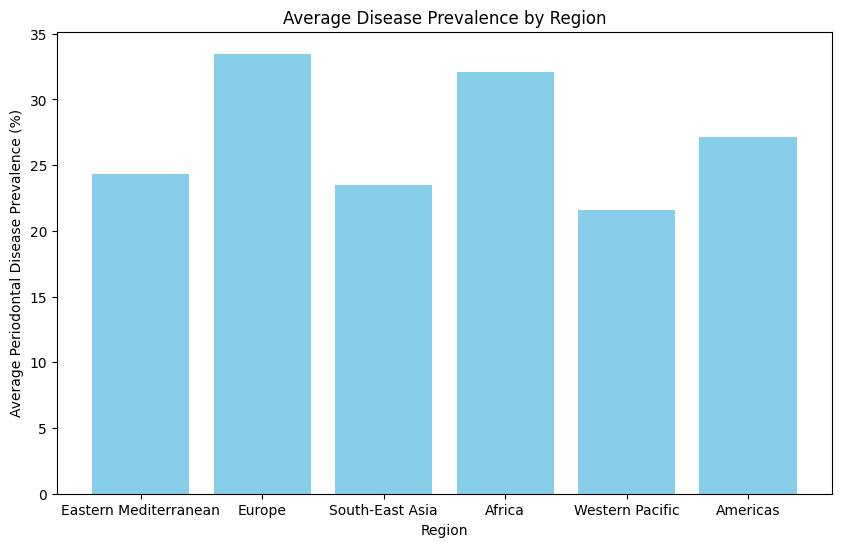

In [14]:
# Example: Aggregate data by Region (replace with actual region column if available)
import matplotlib.pyplot as plt

# Plot by Region
plt.figure(figsize=(10, 6))
plt.bar(df_clean['Continent'], df_clean['FactValueNumeric'], color='skyblue')
plt.xlabel("Region")
plt.ylabel("Average Periodontal Disease Prevalence (%)")
plt.title("Average Disease Prevalence by Region")
plt.show()


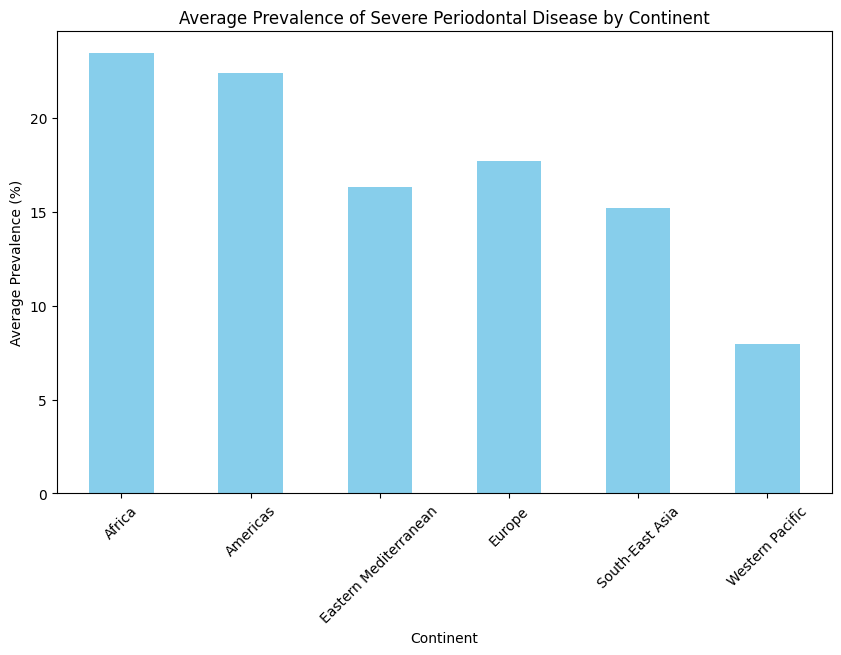

In [15]:
#Bar Plot: Comparing Prevalence across Continents
# Plotting a bar plot to compare FactValueNumeric (Prevalence) across continents
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
continent_avg = df_clean.groupby('Continent')['FactValueNumeric'].mean()
continent_avg.plot(kind='bar', color='skyblue')
plt.title('Average Prevalence of Severe Periodontal Disease by Continent')
plt.ylabel('Average Prevalence (%)')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

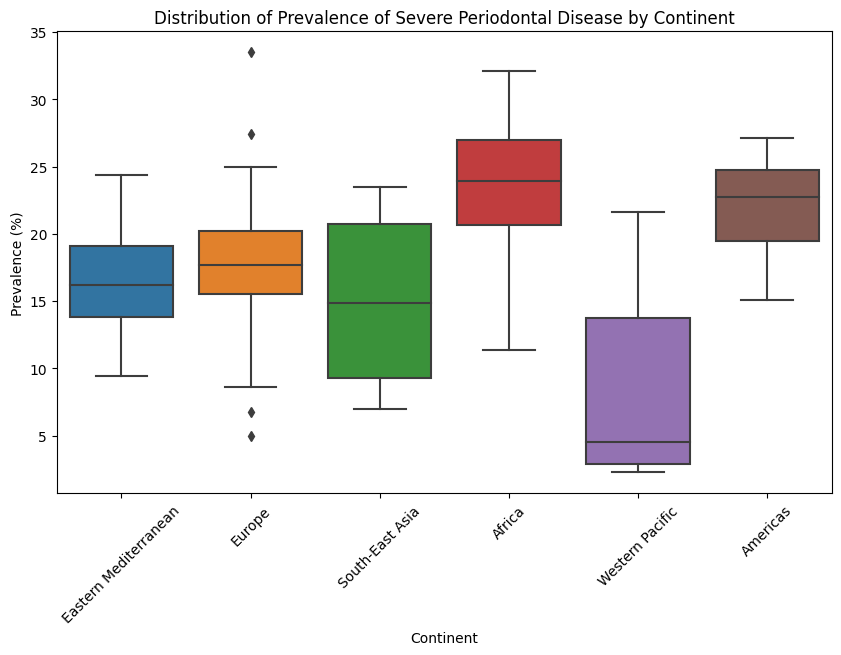

In [16]:
import seaborn as sns

# Boxplot to see the distribution of FactValueNumeric by Continent
plt.figure(figsize=(10,6))
sns.boxplot(x='Continent', y='FactValueNumeric', data=df_clean)
plt.title('Distribution of Prevalence of Severe Periodontal Disease by Continent')
plt.ylabel('Prevalence (%)')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()


Visualizing Individual Data Points for Countries

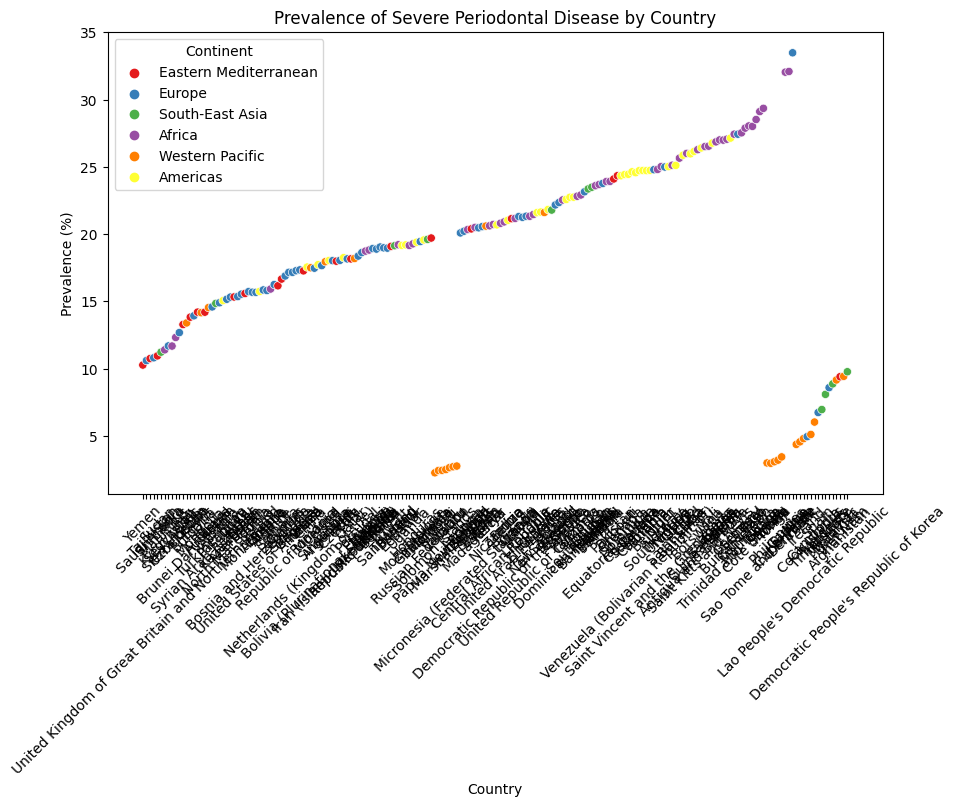

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Country', y='FactValueNumeric', hue='Continent', data=df_clean, palette='Set1')
plt.title('Prevalence of Severe Periodontal Disease by Country')
plt.ylabel('Prevalence (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Continent', loc='upper left')
plt.show()


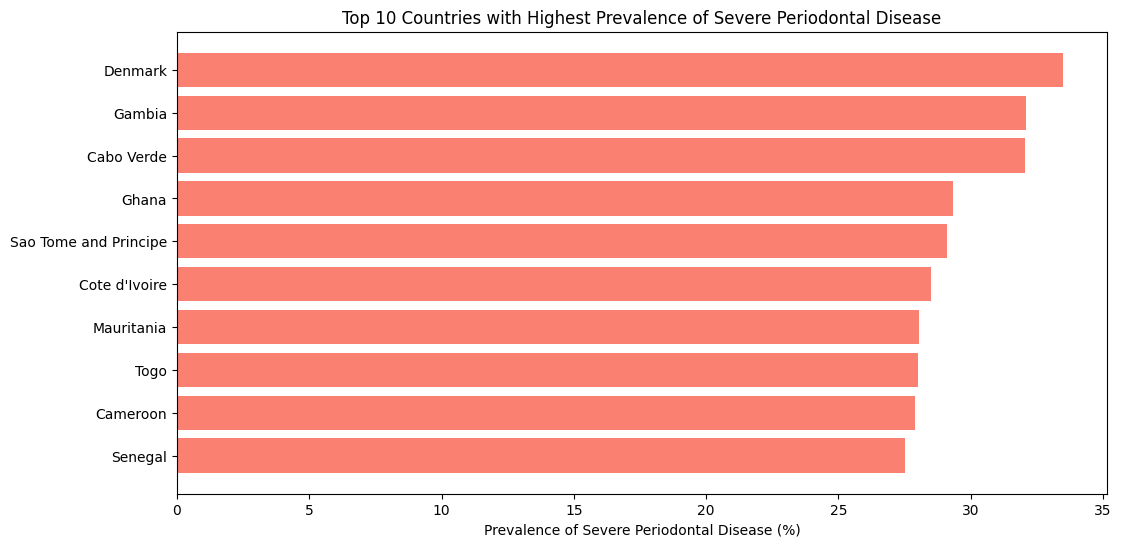

In [18]:
# Sort the dataset by FactValueNumeric in descending order
top_countries = df_clean.sort_values(by='FactValueNumeric', ascending=False).head(10)

# Create a bar plot to visualize the top 10 countries with the highest prevalence
plt.figure(figsize=(12,6))
plt.barh(top_countries['Country'], top_countries['FactValueNumeric'], color='salmon')
plt.xlabel('Prevalence of Severe Periodontal Disease (%)')
plt.title('Top 10 Countries with Highest Prevalence of Severe Periodontal Disease')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

Top 10 countries with the lowest prevalence of severe periodontal disease,

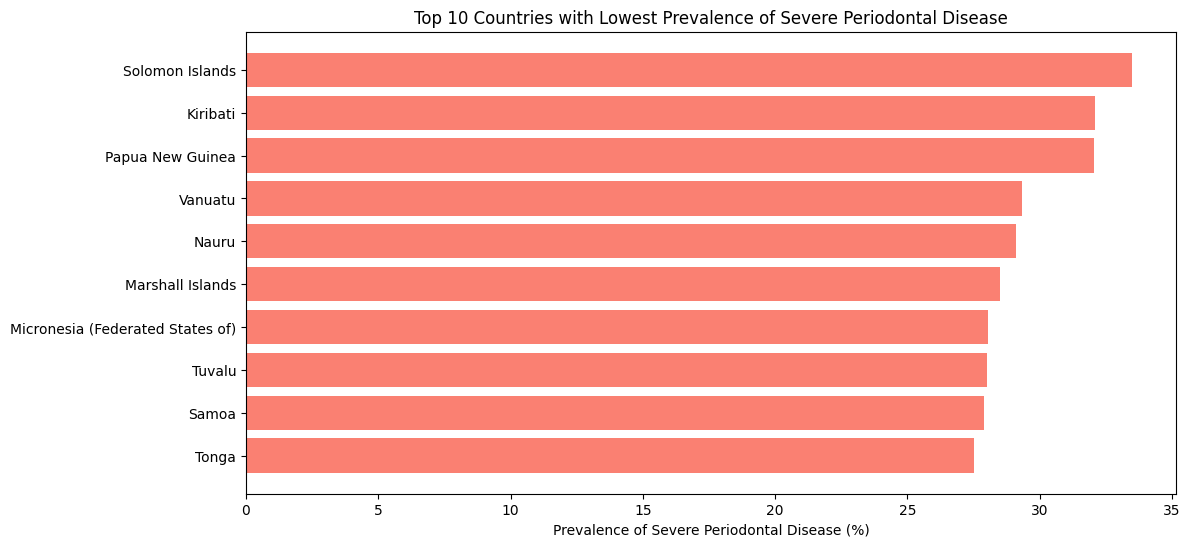

In [19]:
# Sort the dataset by FactValueNumeric in descending order
bottom_countries = df_clean.sort_values(by='FactValueNumeric', ascending=True).head(10)

# Create a bar plot to visualize the top 10 countries with the highest prevalence
plt.figure(figsize=(12,6))
plt.barh(bottom_countries['Country'], top_countries['FactValueNumeric'], color='salmon')
plt.xlabel('Prevalence of Severe Periodontal Disease (%)')
plt.title('Top 10 Countries with Lowest Prevalence of Severe Periodontal Disease')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

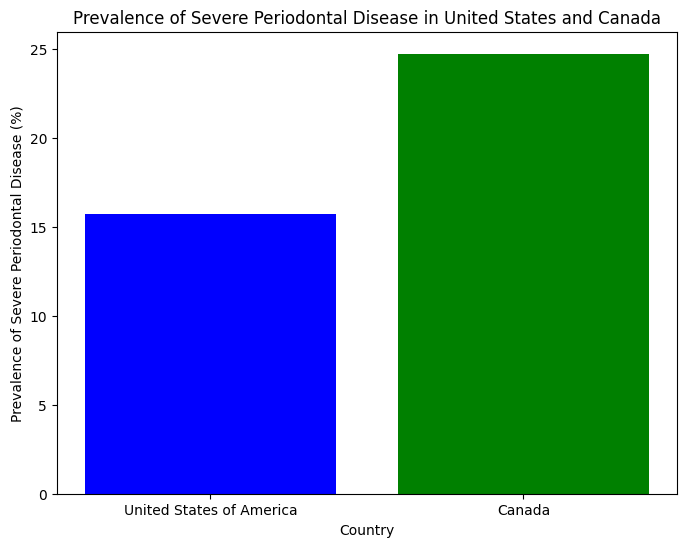

In [20]:
# Filter for United States and Canada
america_canada_df = df_clean[df_clean['Country'].isin(['United States of America', 'Canada'])]

# Plot the bar graph
plt.figure(figsize=(8,6))
plt.bar(america_canada_df['Country'], america_canada_df['FactValueNumeric'], color=['blue', 'green'])
plt.xlabel('Country')
plt.ylabel('Prevalence of Severe Periodontal Disease (%)')
plt.title('Prevalence of Severe Periodontal Disease in United States and Canada')
plt.show()